## The content of the project

 1- EDA (Explonatory Data Analysis)

 2- DATA CLEANING

 3- FEATURE ENGINEERING

 4- ENCODING CATEGORICAL FEATURES

 5- DETECTING OUTLIERS

 6- MACHINE LEARNING

#### Import the dependencies 

In [1]:
%matplotlib inline 

# Python imports
import time 

#Data Manipulation 
import pandas as pd 
import numpy as np

# Data Visualization 
import matplotlib.pyplot as plt 
import missingno 
import seaborn as sns
sns.set_style("whitegrid")

# Ignore the warnings 
import warnings 
warnings.simplefilter(action = "ignore")
import math

#Preprocessing 
from sklearn.preprocessing import OneHotEncoder 

# Machine Learning 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import catboost
from catboost import CatBoostRegressor, Pool, cv

* The goal of the current project is: 
    - to predict the sale price of residential homes in Ames, Iowa. In this project,we will practice feature engineering and regression algorithms to achieve the lowest prediction error (RMSE is the metric used in this competition).

## 1. EDA

In [3]:

#loading  the train and test datasets 
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
submission = pd.read_csv("data/sample_submission.csv")

In [4]:
train.shape

(1460, 81)

In [5]:
train.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

##### Understanding the variables
Data fields
Here's a brief version  the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that we're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


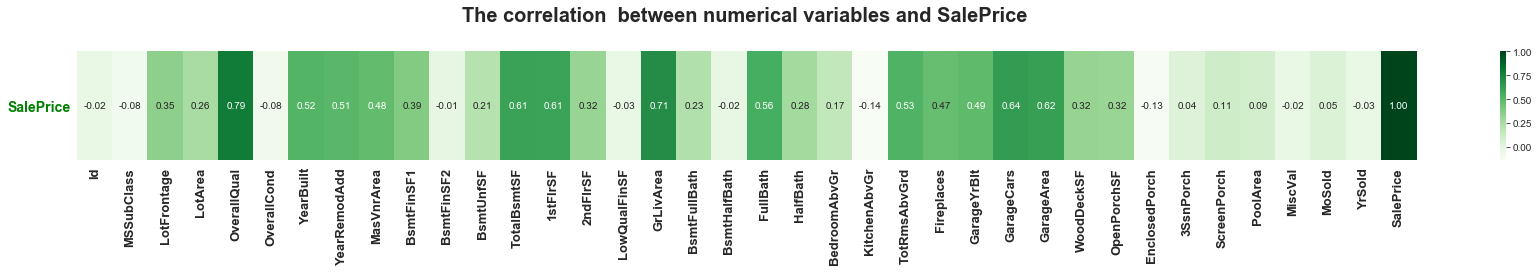

In [7]:
train_corr = train.select_dtypes(exclude = "object")
corr_matrix = train_corr.corr()
plt.figure(figsize=(30,2))
sns.heatmap(corr_matrix.sort_values(by = ["SalePrice"], ascending = False).head(1),
            fmt = ".2f",
            annot = True,
            cmap = "Greens")
plt.title("The correlation  between numerical variables and SalePrice ",
          size = 20,
          weight = "bold",
          loc = "center",
          pad = 30)
plt.xticks(weight = "bold",
           size = 13)
plt.yticks(weight = "bold",
           size = 14,
           rotation = 0,
           color = "green");

In [8]:
# Sorting the features according to the correlation values 
corr_matrix_sorted = corr_matrix["SalePrice"].sort_values(ascending = False).head(10).to_frame()
corr_matrix_sorted

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


* It can be noticeable that The overall quality, the living area, basement area, garage cars and garage area have the highest correlation values with the sale price, which is logical, better quality and bigger area = Higher price.

* Moreover, full bath or 1st floor surface have a higher correlation, those are luxury features, more luxury = Higher price.
and Year built, the newer buildings seem to have higher sale prices.

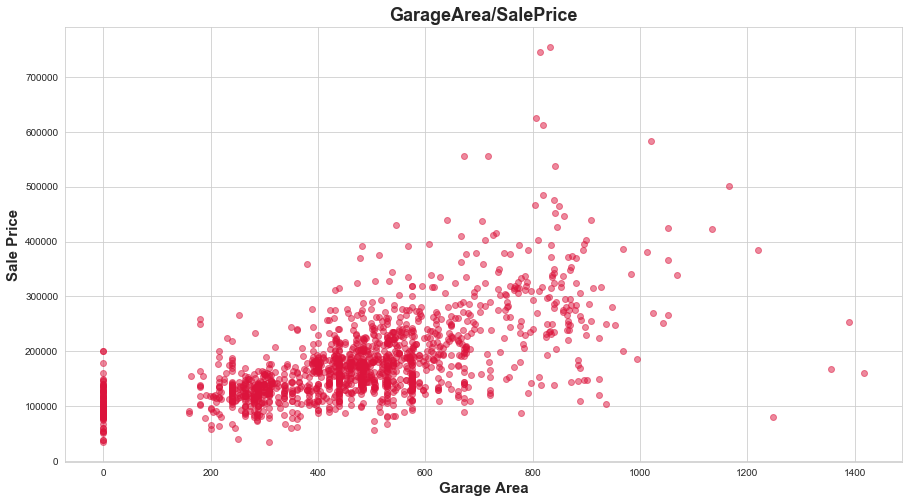

In [9]:
# Let's visualize the correlation between the numerical features  such as "SalePrice" and "GarageCars"
plt.figure(figsize = (15,8))
plt.scatter(x = train["GarageArea"], y = train["SalePrice"], color = "crimson", alpha=0.5)
plt.title("GarageArea/SalePrice", fontsize = 16, weight = "bold", size = 18)
plt.xlabel("Garage Area", fontsize = 12, weight = "bold", size = 15)
plt.ylabel("Sale Price", fontsize = 12, weight = "bold", size = 15)
plt.show();

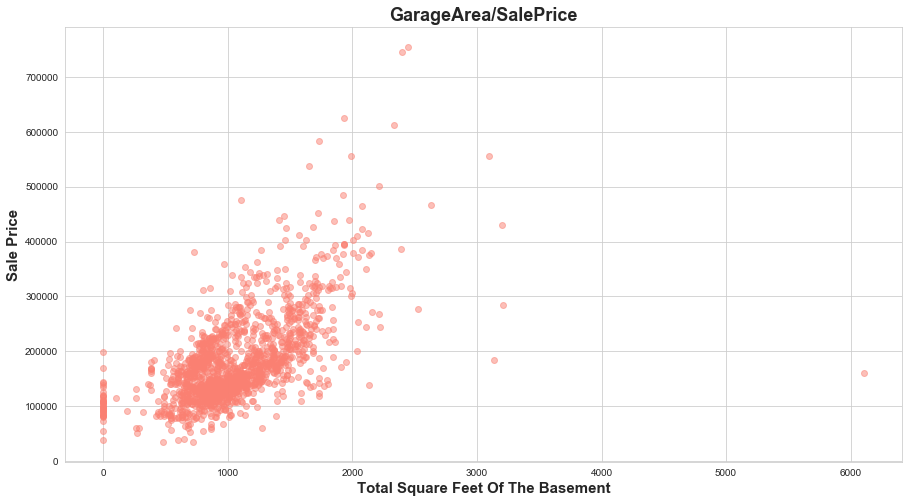

In [10]:
# Let's visualize the correlation between the numerical features  such as "SalePrice" and "Total Square Feet Of The Basement Area"
plt.figure(figsize = (15,8))
plt.scatter(x = train["TotalBsmtSF"], y = train["SalePrice"], color = "salmon", alpha=0.5)
plt.title("GarageArea/SalePrice", fontsize = 16, weight = "bold", size = 18)
plt.xlabel("Total Square Feet Of The Basement", fontsize = 12, weight = "bold", size = 15)
plt.ylabel("Sale Price", fontsize = 12, weight = "bold", size = 15)
plt.show();

* Above, I made a brief exploration between the numerical features vs the target feature. Well, categorical variables also can be as important numeric ones. For instance, the location of the house can play a major role while predicting the price of the house. So the neighborhood can be considered as an important feature 

Text(0.5, 0, 'Counts')

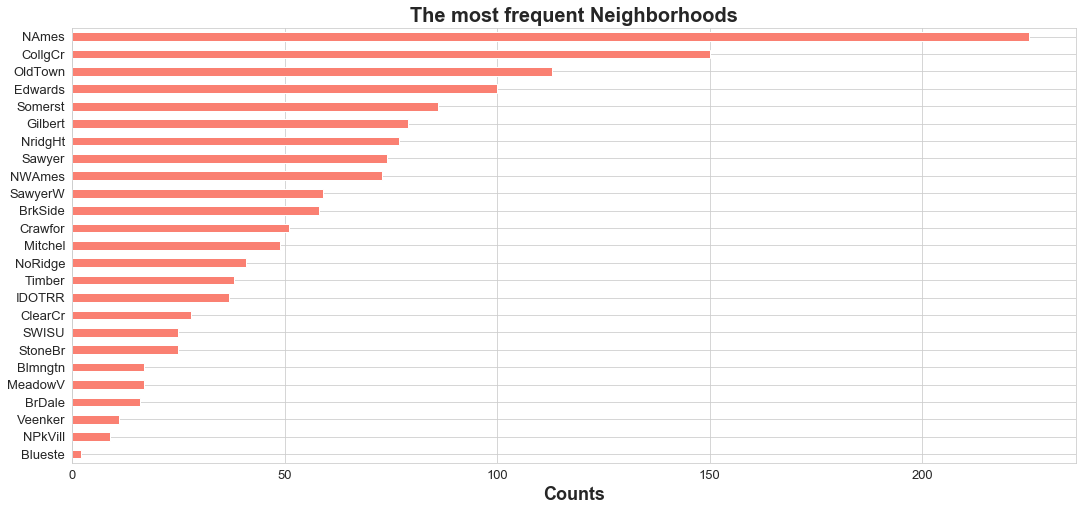

In [11]:
#Let's check out the most often Neighborhoods where houses were sold
train.Neighborhood.value_counts().sort_values().plot(kind = "barh",
                                                     figsize = (18,8),
                                                     color = "salmon",
                                                     fontsize = 13);
plt.title("The most frequent Neighborhoods", size = 30, fontsize = 20, weight = "bold")
plt.xlabel("Counts", fontsize = 15, size = 18, weight = "bold")

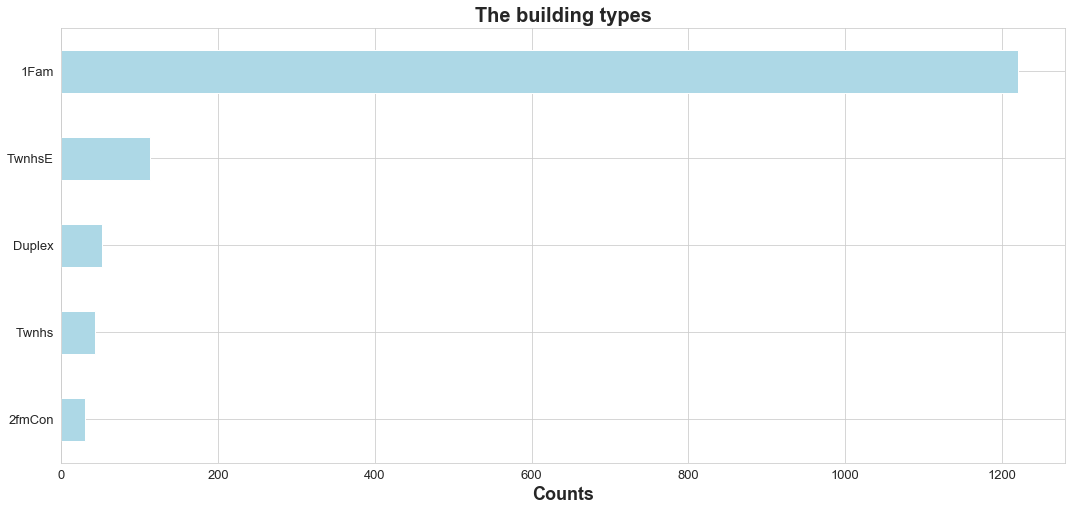

In [12]:
#Let's check out the count of the type of the dwelling feature
train.BldgType.value_counts().sort_values().plot(kind = "barh",
                                                     figsize = (18,8),
                                                     color = "lightblue",
                                                     fontsize = 13);
plt.title("The building types", size = 30, fontsize = 20, weight = "bold")
plt.xlabel("Counts", fontsize = 15, size = 18, weight = "bold");

# 2.1 Data Cleaning (Train DATA)

* First thing to do is get rid of the features with more than 80% missing values (figure below). For example the Fence's missing values are probably due to the lack of fence in some buildings, which is very logical. But replacing those (more than 80%) missing values with "no fence" will leave us with a feature with low variance, and low variance features are uniformative for machine learning models. So we drop the features with more than 80% missing values.

In [13]:
train.Fence.isna().sum()

1179

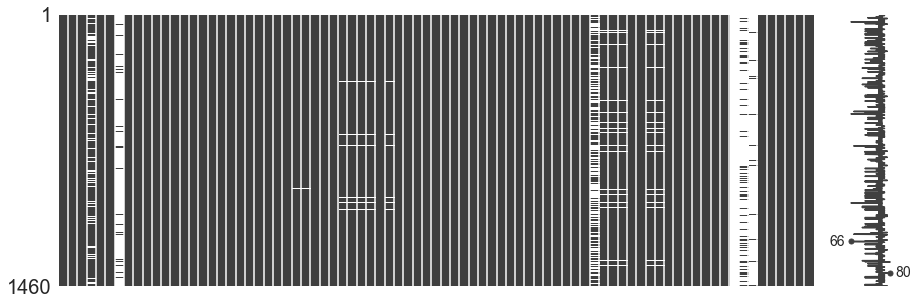

In [14]:
# Plotting the graphic of the missing values
missingno.matrix(train, figsize = (15,5));

In [15]:
train.shape

(1460, 81)

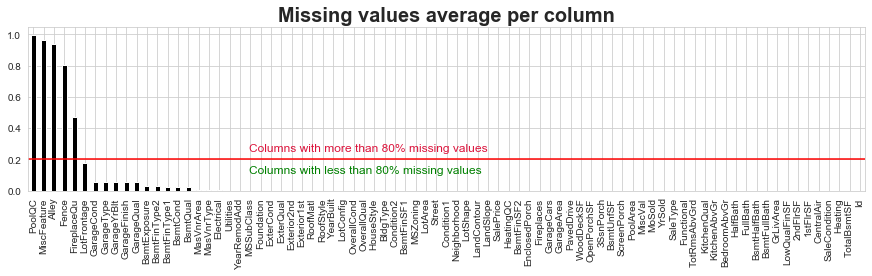

In [16]:
# More visualization of missing using matplotlib (training data)
plt.figure(figsize=(15,3))
train.isnull().mean().sort_values(ascending=False).plot.bar(color='black')
plt.axhline(y=0.20, color='r', linestyle='-')
plt.title('Missing values average per column', fontsize=20, weight='bold' )
plt.text(20.90, 0.305, 'Columns with more than 80% missing values', fontsize=12, color='crimson',ha='left' ,va='top')
plt.text(20.90, 0.165, 'Columns with less than 80% missing values', fontsize=12, color='green',ha='left' ,va='top');


In [17]:
#Lets get the names of the top 5 columns with the missing values 
train.isna().sum().sort_values(ascending=False).head()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [18]:
# Let's drop the 5 columns from the training data since they have more 80% of missing data in eavch column 
train = train.dropna(thresh = len(train)*0.8, axis = 1)
train.shape

(1460, 76)

#### Prior to cleaning the data let's plot the data wiht missing values once again (after the dropping the top 5 missing columns)

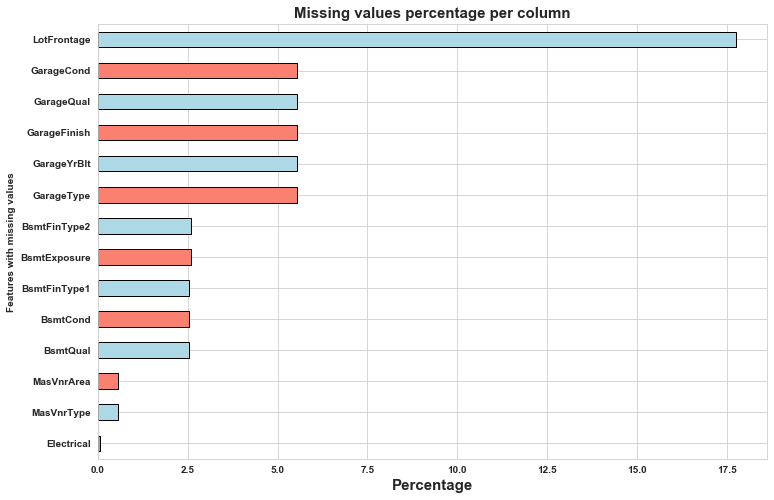

In [19]:
allna = train.isna().sum()/len(train)*100
allna = allna.drop(allna[allna==0].index).sort_values()
plt.figure(figsize=(12,8))
allna.plot.barh(color = ('salmon', 'lightblue'), edgecolor = "black")
plt.title("Missing values percentage per column", fontsize = 15, weight = "bold")
plt.xlabel("Percentage", weight = "bold", size = 15)
plt.ylabel("Features with missing values", weight = "bold")
plt.xticks(weight = "bold")
plt.yticks(weight = "bold");

## Filling out the numeric missing values 

In [20]:
# Find out the numeric missing values 
for label, content in train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


* LotFrontage: Linear feet of street connected to property::: *This lable has 16% missing values, so I am going to fill it with median value*

* MasVnrArea: Masonry veneer area in square feet::: *The missing data means no veneer so I am gonna fill it with 0.*

* GarageYrBlt: Year garage was built::: *I will fill the gaps wiht the median: 1980*

In [21]:
# Filling the numeric missing values 
train["LotFrontage"] = train["LotFrontage"].fillna(train["LotFrontage"].median())
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(train["GarageYrBlt"].median())

In [22]:
# Checking whether the data has numeric missing values 
for label, content in train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

## Filling out the categorical missing values 

In [23]:
# Checking whether the data has categorical missing values 
missing_cat = []
for label, content in train.items():
    if pd.api.types.is_object_dtype(content):
        if pd.isna(content).sum():
            missing_cat.append(label)

In [24]:
#Get all the missing categorical labels and assign a separate name to make a table. To know the quantity of the missing values in each column

missing_cat = train[['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish', 'GarageQual','GarageCond']]

In [25]:
missing_cat.head()

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA


In [26]:
# Make a table according to the missing values pf the categorical columns 
missing_cat_quant = missing_cat.isna().sum().to_frame().sort_values(by = [0]).T
missing_cat_quant = missing_cat_quant.style.background_gradient()
missing_cat_quant

,Electrical,MasVnrType,BsmtQual,BsmtCond,BsmtFinType1,BsmtExposure,BsmtFinType2,GarageType,GarageFinish,GarageQual,GarageCond
0,1,8,37,37,37,38,38,81,81,81,81


In [27]:
#I start with features having just few missing value (Electrical and MasVnrType):  We fill the gap with forward fill method:
train["Electrical"] = train['Electrical'].fillna(method = "ffill")
train["MasVnrType"] = train["MasVnrType"].fillna(method = "ffill")

In [28]:
train.isna().sum().sort_values(ascending = False).head(10)

GarageCond      81
GarageType      81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
YearRemodAdd     0
dtype: int64

* We dealt already with small missing values or values that can't be filled with "0" such as Garage year built.

* The rest of the features are mostly basement and garage re;ated missing values, we will just fill 0s in the numerical features and 'None' in categorical features, assuming that the houses don't have basements, full bathrooms or garage.

In [29]:
#Filling the rest of the categorical missing values swith None values
missing_cat_cols = train.columns
for col in missing_cat_cols:
    if train[col].dtype == "object":
        train[col] = train[col].fillna("None")       

In [30]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [31]:
train.shape

(1460, 76)

# 2.2 Data Cleaning (Test DATA)

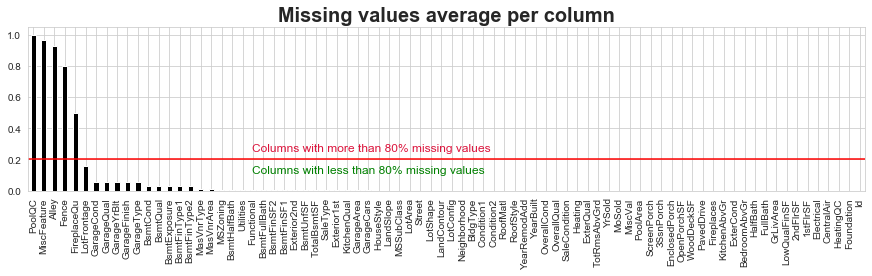

In [32]:
# More visualization of missing using matplotlib (test data)
plt.figure(figsize=(15,3))
test.isnull().mean().sort_values(ascending=False).plot.bar(color='black')
plt.axhline(y=0.20, color='r', linestyle='-')
plt.title('Missing values average per column', fontsize=20, weight='bold' )
plt.text(20.90, 0.305, 'Columns with more than 80% missing values', fontsize=12, color='crimson',ha='left' ,va='top')
plt.text(20.90, 0.165, 'Columns with less than 80% missing values', fontsize=12, color='green',ha='left' ,va='top');

In [33]:
#Lets get the names of the top 5 columns with the missing values 
test.isna().sum().sort_values(ascending=False).head()

PoolQC         1456
MiscFeature    1408
Alley          1352
Fence          1169
FireplaceQu     730
dtype: int64

* Making sure we are dropping the same columns of the missing values as we did in train data
 * The columns that were dropped from the traininh dataset:
        PoolQC         1453
        MiscFeature    1406
        Alley          1369
        Fence          1179
        FireplaceQu     690
        
#### Dropped columns of the training and test data matched         

In [34]:
# Let's drop the 5 columns from the training data since they have more 80% of missing data in eavch column 
test = test.dropna(thresh = len(test)*0.8, axis = 1)
test.shape

(1459, 75)

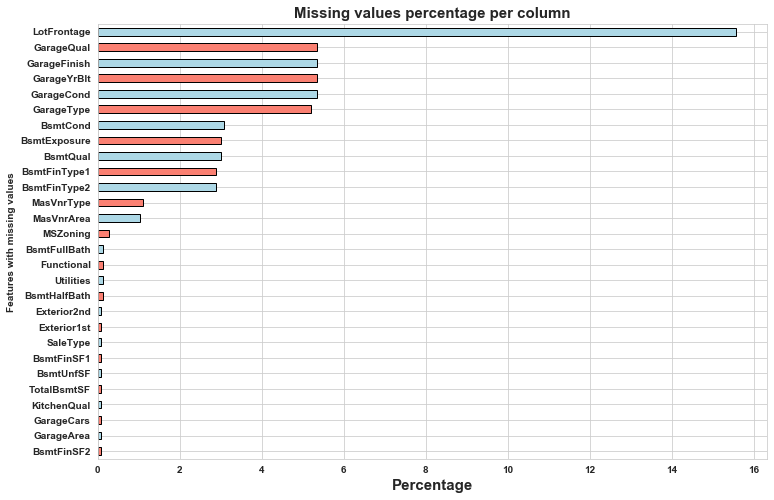

In [35]:
# Let's visualize the rest of missing values by the percentages 
allna = test.isna().sum()/len(test)*100
allna = allna.drop(allna[allna==0].index).sort_values()
plt.figure(figsize=(12,8))
allna.plot.barh(color = ('salmon', 'lightblue'), edgecolor = "black")
plt.title("Missing values percentage per column", fontsize = 15, weight = "bold")
plt.xlabel("Percentage", weight = "bold", size = 15)
plt.ylabel("Features with missing values", weight = "bold")
plt.xticks(weight = "bold")
plt.yticks(weight = "bold");

### Filling out the numeric missing values

In [36]:
# Find out the numeric missing values 
for label, content in test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea


* I start with the numerical features, first thing to do is have a look at them to learn more about their distribution and decide how to clean them:
* Most of the features are going to be filled with 0s because we assume that they don't exist, for example GarageArea, GarageCars with missing values are simply because the house lacks a garage.
* GarageYrBlt: Year garage was built can't be filled with 0s, so we fill with the median (1980).

In [37]:
# Filling the numeric missing values 
test["LotFrontage"] = train["LotFrontage"].fillna(train["LotFrontage"].median())
test["GarageYrBlt"] = train["GarageYrBlt"].fillna(train["GarageYrBlt"].median())

In [38]:
# Filling the rest of the numerical missing values with the value of "0"
missing_num_cols = test.columns
for col in missing_num_cols:
    if test[col].dtype != "object":
        test[col] = test[col].fillna(0)    

In [39]:
# Checking whether the test data has any missing columns left
for label, content in test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

* Now the test dataset doesnt have any numeric missing values

### Filling out the categorical missing values (Test Dataset)

In [40]:
# Checking whether the data has categorical missing values 
missing_cat_test = []
for label, content in test.items():
    if pd.api.types.is_object_dtype(content):
        if pd.isna(content).sum():
            missing_cat_test.append(label)

In [41]:
missing_cat_test

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [42]:
#Get all the missing categorical labelsof the teest dataset and assign a separate name to make a table. To know the quantity of the categorical missing values in each column
missing_cat_test_quant = test[['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','SaleType']]


In [43]:
missing_cat_test_quant.head()

,MSZoning,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType
0,RH,AllPub,VinylSd,VinylSd,None,TA,TA,No,Rec,LwQ,TA,Typ,Attchd,Unf,TA,TA,WD
1,RL,AllPub,Wd Sdng,Wd Sdng,BrkFace,TA,TA,No,ALQ,Unf,Gd,Typ,Attchd,Unf,TA,TA,WD
2,RL,AllPub,VinylSd,VinylSd,None,Gd,TA,No,GLQ,Unf,TA,Typ,Attchd,Fin,TA,TA,WD
3,RL,AllPub,VinylSd,VinylSd,BrkFace,TA,TA,No,GLQ,Unf,Gd,Typ,Attchd,Fin,TA,TA,WD
4,RL,AllPub,HdBoard,HdBoard,None,Gd,TA,No,ALQ,Unf,Gd,Typ,Attchd,RFn,TA,TA,WD


In [44]:
# Make a table according to the missing values of the categorical columns in test data 
missing_categorical = missing_cat_test_quant.isna().sum().to_frame().sort_values(by = [0]).T
missing_categorical = missing_categorical.style.background_gradient()
missing_categorical

,SaleType,Exterior1st,Exterior2nd,KitchenQual,Utilities,Functional,MSZoning,MasVnrType,BsmtFinType2,BsmtFinType1,BsmtExposure,BsmtQual,BsmtCond,GarageType,GarageCond,GarageFinish,GarageQual
0,1,1,1,1,2,2,4,16,42,42,44,44,45,76,78,78,78


In [45]:
#I start with features having just few missing value :  We fill the gap with forward fill method:
test["SaleType"] = test["SaleType"].fillna(method = "ffill")
test["Exterior1st"] = test["Exterior1st"].fillna(method = "ffill")
test["Exterior2nd"] = test["Exterior2nd"].fillna(method = "ffill")
test["KitchenQual"] = test["KitchenQual"].fillna(method = "ffill")
test["Utilities"] = test["Utilities"].fillna(method = "ffill")
test["Functional"] = test["Functional"].fillna(method = "ffill")
test["MSZoning"] = test["MSZoning"].fillna(method = "ffill")
test["MasVnrType"] = test["MasVnrType"].fillna(method = "ffill")

In [46]:
test.isna().sum().sort_values(ascending = False).head(10)

GarageFinish     78
GarageCond       78
GarageQual       78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType1     42
BsmtFinType2     42
SaleCondition     0
dtype: int64

In [47]:
#Filling the rest of the categorical missing values of the TEST DATASET with None values
missing_test_cat = test.columns
for col in missing_test_cat:
    if test[col].dtype == "object":
        test[col] = test[col].fillna("None")   

In [48]:
test.isna().sum().sort_values(ascending = False)

SaleCondition    0
YearBuilt        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Id               0
Length: 75, dtype: int64

In [49]:
# Lets check the shape of the test dataset 
test.shape

(1459, 75)

In [50]:
#Let's check our test and  train datasets shapes

train.shape, test.shape

((1460, 76), (1459, 75))

##### We have one more column in train dataset (76) than test dataset(75) because it includes the the target column "SalePrice"

# 3- Feature engineering:

### Since feature ingennering is an important factor for improving the model. I am going to genrate 3 new features
* TotaArea
* Bathrooms 
* YearAverage 

In [51]:
# Feature ingeenering for the TRAIN dataset
train["TotalArea"] =  train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'] + train['GrLivArea'] + train['GarageArea']
train["Bathrooms"] = train['FullBath'] + train['HalfBath']*0.5 
train["YearAverage"] = (train['YearRemodAdd']+train['YearBuilt'])/2

In [52]:
# Feature ingeenering for the TEST dataset
test["TotalArea"] =  test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF'] + test['GrLivArea'] + test['GarageArea']
test["Bathrooms"] = test['FullBath'] + test['HalfBath']*0.5 
test["YearAverage"] = (test['YearRemodAdd']+test['YearBuilt'])/2

In [53]:
# Checkout the shapes of the test and train datasets 
train.shape, test.shape

((1460, 79), (1459, 78))

* We have added 3 more features for each dataset so we have 79 features in train dataset and 78 features in test dataset

# 4. Factorizing  the categorical Features 

#### 4.1 Numerical features:
We start with numerical features that are actually categorical, for example "Month sold", the values are from 1 to 12, each number is assigned to a month November is number 11 while March is number 3. 11 is just the order of the months and not a given value, so we convert the "Month Sold" feature to categorical

In [54]:
# TRAIN dataset: convert numerical to categorical 
train["MoSold"] = train["MoSold"].astype(str)
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)

In [55]:
# TEST dataset: convert numerical to categorical 
test["MoSold"] = test["MoSold"].astype(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)
test['YrSold'] = test['YrSold'].astype(str)

In [56]:
train.shape, test.shape

((1460, 79), (1459, 78))

#### 4.2 Factorizing the train and test datasets


In [57]:
# Factorizing TRAIN DATASET
#train_factorized = pd.factorize(train)
train_factorized = train.apply(lambda x: pd.factorize(x)[0])
train_factorized.shape

(1460, 79)

In [58]:
# Factorizing TEST DATASET
test_factorized = test.apply(lambda x: pd.factorize(x)[0])
test_factorized.shape

(1459, 78)

In [59]:
train_factorized.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,Bathrooms,YearAverage
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,0,0,0,1,...,0,0,1,1,0,0,1,1,1,1
2,2,0,0,2,2,0,1,0,0,0,...,0,0,2,0,0,0,2,2,0,2
3,3,2,0,3,3,0,1,0,0,2,...,0,0,0,2,0,1,3,3,2,3
4,4,0,0,4,4,0,1,0,0,1,...,0,0,3,0,0,0,4,4,0,4
5,5,3,0,5,5,0,1,0,0,0,...,0,1,4,3,0,0,5,5,3,5
6,6,1,0,6,6,0,0,0,0,0,...,0,0,5,1,0,0,6,6,1,6
7,7,0,0,7,7,0,1,0,0,2,...,0,2,6,3,0,0,7,7,0,7
8,8,3,1,8,8,0,0,0,0,0,...,0,0,7,0,0,1,8,8,1,8
9,9,4,0,9,9,0,0,0,0,2,...,0,0,8,0,0,0,9,9,2,9


In [60]:
test_factorized.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea,Bathrooms,YearAverage
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,1,0,0,1,...,1,0,1,0,0,0,0,1,1,1
2,2,1,1,2,2,0,1,0,0,0,...,1,0,0,1,0,0,0,2,2,2
3,3,1,1,3,3,0,1,0,0,0,...,1,0,0,0,0,0,0,3,2,3
4,4,2,1,4,4,0,1,1,0,0,...,2,0,0,2,0,0,0,4,3,4
5,5,1,1,5,5,0,1,0,0,1,...,1,0,0,3,0,0,0,5,2,5
6,6,0,1,6,6,0,1,0,0,0,...,1,0,2,1,0,0,0,6,3,6
7,7,1,1,7,7,0,1,0,0,0,...,1,0,0,4,0,0,0,7,2,3
8,8,0,1,8,8,0,0,0,0,0,...,1,0,0,5,0,0,0,8,1,7
9,9,0,1,9,9,0,0,0,0,1,...,1,0,0,3,0,0,0,9,0,8


In [61]:
# Save the train_factorized and test_factorized to csv files 
train_factorized.to_csv("train_factorized.csv", index = False)
test_factorized.to_csv("test_factorized.csv", index = False)


#### 4.2 On hot Encoding  the train and test datasets


In [62]:
train_one_hot=pd.get_dummies(train)
print("the shape of the original dataset",train.shape)
print("the shape of the encoded dataset",train_one_hot.shape)
print("We have ",train_one_hot.shape[1]- train.shape[1], 'new encoded features')

the shape of the original dataset (1460, 79)
the shape of the encoded dataset (1460, 313)
We have  234 new encoded features


In [63]:
test_one_hot=pd.get_dummies(test)
print("the shape of the original dataset",test.shape)
print("the shape of the encoded dataset",test_one_hot.shape)
print("We have ",test_one_hot.shape[1]- test.shape[1], 'new encoded features')

the shape of the original dataset (1459, 78)
the shape of the encoded dataset (1459, 297)
We have  219 new encoded features


* Clearnly, we have a difference what it comes to features of train and test dataset after one hot encoding.
we have 234 new encoded features in train dataset while 219 features(We also have to take ito account that train  dataset must have one more column because it has the target column "SalePrice"). First, we must find the delta columns in train dataset to make it similar to test dataset.

In [64]:
#printing the difference in features train vs test
diff_feat = []
for i in train_one_hot.columns:
    if i not in test_one_hot:
        diff_feat.append(i)

In [65]:
diff_feat

['SalePrice',
 'Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Ex']

* I will not include the "SalePrice" since it is our target variable in the train dataset 

In [66]:
train_one_hot.drop(['Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile',
                                    'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll','Exterior1st_ImStucc','Exterior1st_Stone', 'Exterior2nd_Other', 
                                    'Heating_Floor','Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex'], axis = 1, inplace = True)

In [67]:
train_one_hot

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,1458,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,1459,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [68]:
# Checkout for the difference train vs test
for i in train_one_hot.columns:
    if i not in test_one_hot.columns:
        print(i)

SalePrice


In [69]:
# Checkout for the difference test vs train
for i in test_one_hot.columns:
    if i not in train_one_hot.columns:
        print(i)

MSSubClass_150


In [70]:
test_one_hot.drop(["MSSubClass_150"], axis = 1, inplace = True)

In [71]:
# Checkout for the difference test vs train
for i in test_one_hot.columns:
    if i not in train_one_hot.columns:
        print(i)

In [72]:
train_one_hot.shape, test_one_hot.shape

((1460, 297), (1459, 296))

* Now we have the desirable datasets in train and test datasets. We can proceed with next step after saving the datasets

In [73]:
# Save the train_one_hot and test_one_hot to csv for the future use 
train_one_hot.to_csv("train_one_hot.csv", index = False)
test_one_hot.to_csv("test_one_hot.csv", index = False)

# 5. Outlier Detection 

### 5.1 Outliers visualization:

* In this section I will be dealing with the outliers of the TRAIN and TEST datasets. The method I will be using for dealing with outliers will be replacing the outliear with mean, median or mode.

- OK. So we will go back to train and test dataset to visualize the important features / Sale price scatter plot to find outliers and replace the outliers with one of these metrics (median/mode/mean)

In [74]:
# reimport the train and test datasets
train_1 = pd.read_csv("train_one_hot.csv")
test_1 = pd.read_csv("test_one_hot.csv")

In [75]:
train_1.shape, test_1.shape

((1460, 297), (1459, 296))

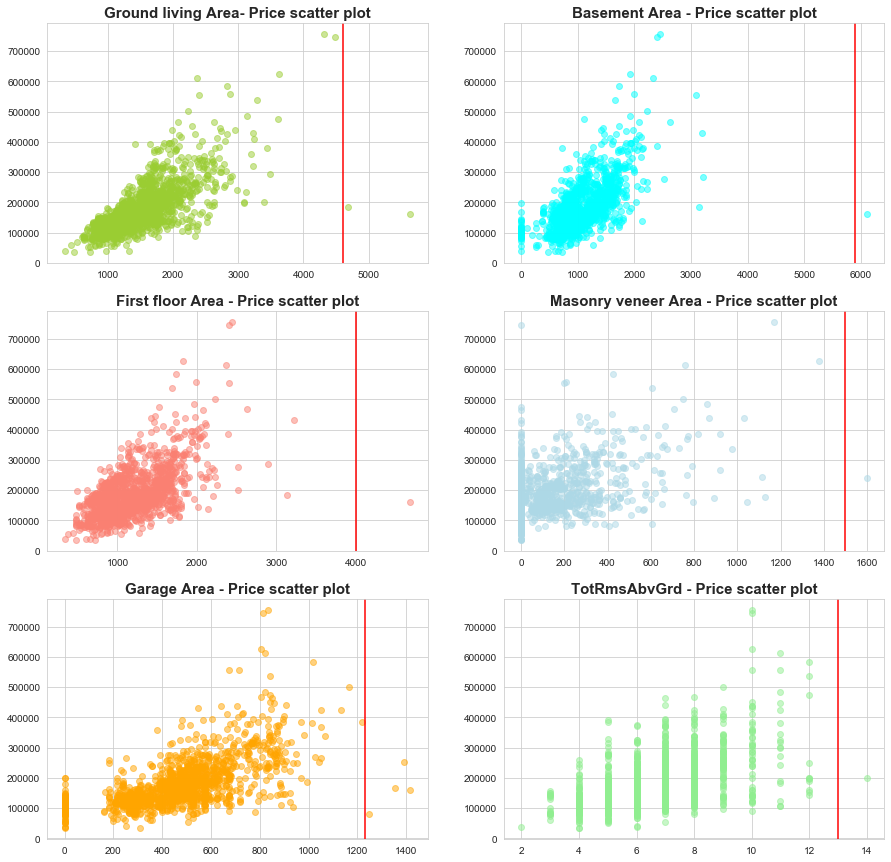

In [76]:
fig = plt.figure(figsize =(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x = train_1["GrLivArea"], y = train_1["SalePrice"], color = ("yellowgreen"), alpha = 0.5)
plt.axvline(x=4600, color = "r", linestyle = "-")
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x = train_1["TotalBsmtSF"], y = train_1["SalePrice"], color = ("Cyan"), alpha = 0.5)
plt.axvline(x = 5900, color = "r", linestyle = "-")
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x = train_1["1stFlrSF"], y = train_1["SalePrice"], color = ("salmon"), alpha = 0.5)
plt.axvline( x = 4000, color = "r", linestyle ="-")
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x = train_1["MasVnrArea"], y = train_1["SalePrice"], color = ("lightblue"), alpha = 0.5)
plt.axvline(x = 1500, color = "r", linestyle = "-")
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x = train_1["GarageArea"], y = train_1["SalePrice"], color = ("orange"), alpha = 0.5)
plt.axvline(x = 1230, color = "r", linestyle = "-")
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2), (2,1))
plt.scatter(x = train_1["TotRmsAbvGrd"], y = train_1["SalePrice"], color = ("lightgreen"), alpha = 0.5)
plt.axvline(x = 13, color ="r", linestyle = '-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold')
plt.show()

* The outliers are the points in the right that have a larger area or value but a very low sale price. We localize those points by sorting their respective columns

* Interesting! The outlier in "basement" and "first floor" features is the same as the first outlier in ground living area: The outlier with index number 1298.

### 5.2 Outliers localization:

* We sort the columns containing the outliers shown in the graph, we will use the function head() to show the outliers: head(number of outliers or dots shown in each plot)

In [77]:
# Ground living area (Outlier): the third value is for replacement 
train_1["GrLivArea"].sort_values(ascending = False).head(3)

1298    5642
523     4676
1182    4476
Name: GrLivArea, dtype: int64

In [78]:
# Basement Area (Outlier): the second value is for the replacement 
train_1["TotalBsmtSF"].sort_values(ascending = False).head(2)

1298    6110
332     3206
Name: TotalBsmtSF, dtype: int64

In [79]:
# First Floor Area: the second value is for the replacement
train_1["1stFlrSF"].sort_values(ascending = False).head(2)

1298    4692
496     3228
Name: 1stFlrSF, dtype: int64

In [80]:
# Masory Veneer Area(Outlier):  the second value is needed for the rteplacement 
train_1["MasVnrArea"].sort_values(ascending = False).head(2)

297     1600.0
1169    1378.0
Name: MasVnrArea, dtype: float64

In [81]:
# Garage Area (Outlier): the fifth value is needed for the replacement of the first four outliers
train_1["GarageArea"].sort_values(ascending = False).head(5)

1298    1418
581     1390
1190    1356
1061    1248
825     1220
Name: GarageArea, dtype: int64

In [82]:
# Total Rooms Above Grade (Outlier): the second value is needed for the replacement of the first value(outlier)
train_1["TotRmsAbvGrd"].sort_values(ascending = False).head(2)

635    14
897    12
Name: TotRmsAbvGrd, dtype: int64

### 5.3 Outlier replacement 

* We are going to replace the outliers with method called "winsorize"(this method replaces the outlier with ascending max value located after the outlier values)

In [83]:
# Replacemnt winsorizing method for Ground Living Area
train_1["GrLivArea"] = np.where(train_1["GrLivArea"]>=4676,4476, train_1["GrLivArea"])

In [84]:
# Checking whether the outlier was replaced
train_1["GrLivArea"].sort_values(ascending = False).head(3)

1182    4476
523     4476
1298    4476
Name: GrLivArea, dtype: int64

In [85]:
# Replacemnt winsorizing method for Basement Area
train_1["TotalBsmtSF"] = np.where(train_1["TotalBsmtSF"]==6110, 3206,train_1["TotalBsmtSF"])

In [86]:
# Checking whether the outlier was replaced
train_1["TotalBsmtSF"].sort_values(ascending = False).head(2)

1298    3206
332     3206
Name: TotalBsmtSF, dtype: int64

In [87]:
# Replacemnt winsorizing method for first floor area
train_1["1stFlrSF"] = np.where(train_1["1stFlrSF"]==4692,  3228, train_1["1stFlrSF"])

In [88]:
# Checking whether the outlier was replaced
train_1["1stFlrSF"].sort_values(ascending = False).head(2)

1298    3228
496     3228
Name: 1stFlrSF, dtype: int64

In [89]:
# Replacemnt winsorizing method for Masory Veneer Area
train_1["MasVnrArea"] = np.where(train_1["MasVnrArea"]==1600.0,1378.0, train_1["MasVnrArea"])

In [90]:
# Checking whether the outlier was replaced
train_1["MasVnrArea"].sort_values(ascending = False).head(2)

297     1378.0
1169    1378.0
Name: MasVnrArea, dtype: float64

In [91]:
# Replacemnt winsorizing method for Garage Area 
train_1["GarageArea"] = np.where(train_1["GarageArea"]>=1248, 1220, train_1["GarageArea"])

In [92]:
# Checking whether the outliers were replaced 
train_1["GarageArea"].sort_values(ascending = False).head(5)

1298    1220
1190    1220
1061    1220
825     1220
581     1220
Name: GarageArea, dtype: int64

In [93]:
# Replacement Winsorizing method for total rooms above grade 
train_1["TotRmsAbvGrd"] = np.where(train_1["TotRmsAbvGrd"]==14, 12, train_1["TotRmsAbvGrd"])

In [94]:
# Chekcing whether the outlier was replaced 
train_1["TotRmsAbvGrd"].sort_values(ascending = False).head(2)

897    12
635    12
Name: TotRmsAbvGrd, dtype: int64

### 5.3 Checking out the outliers one more time by visualizing the dataset


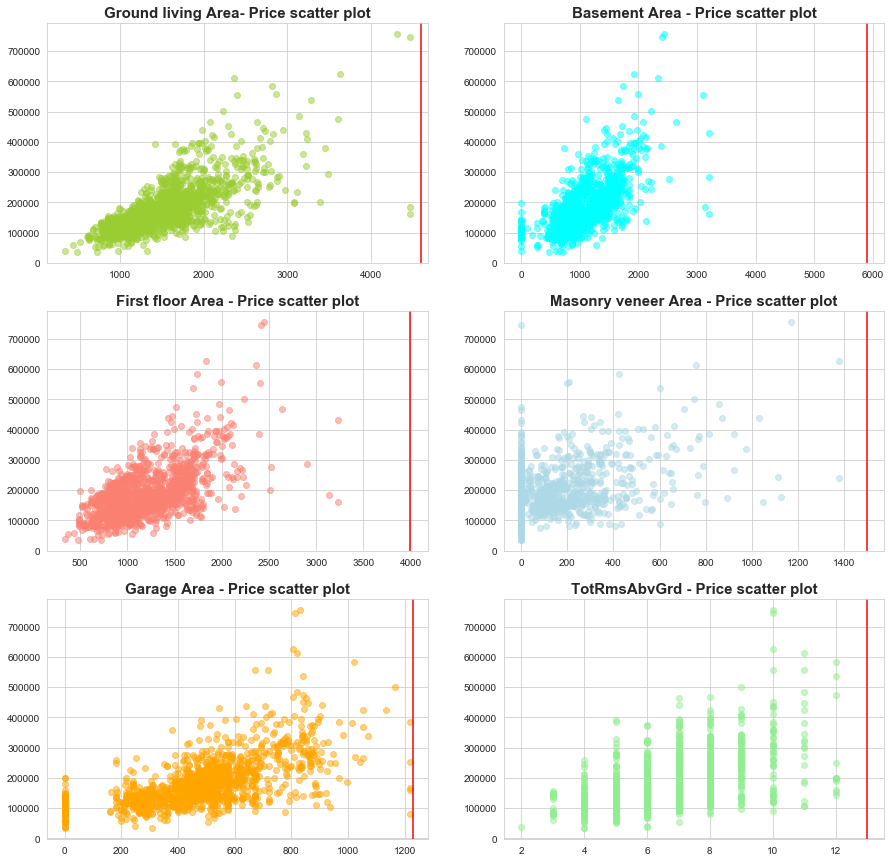

In [95]:
fig = plt.figure(figsize =(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x = train_1["GrLivArea"], y = train_1["SalePrice"], color = ("yellowgreen"), alpha = 0.5)
plt.axvline(x=4600, color = "r", linestyle = "-")
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x = train_1["TotalBsmtSF"], y = train_1["SalePrice"], color = ("Cyan"), alpha = 0.5)
plt.axvline(x = 5900, color = "r", linestyle = "-")
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x = train_1["1stFlrSF"], y = train_1["SalePrice"], color = ("salmon"), alpha = 0.5)
plt.axvline( x = 4000, color = "r", linestyle ="-")
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x = train_1["MasVnrArea"], y = train_1["SalePrice"], color = ("lightblue"), alpha = 0.5)
plt.axvline(x = 1500, color = "r", linestyle = "-")
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x = train_1["GarageArea"], y = train_1["SalePrice"], color = ("orange"), alpha = 0.5)
plt.axvline(x = 1230, color = "r", linestyle = "-")
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2), (2,1))
plt.scatter(x = train_1["TotRmsAbvGrd"], y = train_1["SalePrice"], color = ("lightgreen"), alpha = 0.5)
plt.axvline(x = 13, color ="r", linestyle = '-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold')
plt.show()

* As we can see, we dont have any values on the right side of the red line. This mean we have successfully replaced the outliers with winsorizing method

# 6. Machine Learning 

#### We start the machine learning by setting the features and target 
* x: features 
* y: Target    

In [96]:
x= train_1.drop("SalePrice", axis = 1)
y = train_1["SalePrice"]

We use RobustScaler to scale our data because it's powerful against outliers, we already detected some but there must be some other outliers out there

In [97]:
x.shape,y.shape

((1460, 296), (1460,))

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y,test_size = .2, random_state=0)

In [99]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1168, 296), (292, 296), (1168,), (292,))

### Usage of Random Forest Regressor

In [101]:
# Instantiate the model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1)

In [102]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y_test,y_preds):
    return np.sqrt(mean_squared_error(y_test, y_preds))

# Create a function to evaluate the model 
def show_scores(model):
    train_preds = model.predict(x_train)
    valid_preds = model.predict(x_valid)
    scores = {"Train MSE": mean_squared_error(y_train,train_preds),
              "Valid MSE": mean_squared_error(y_valid, valid_preds),
              "Train RMSE":rmse(y_train,train_preds),
              "Valid RMSE": rmse(y_valid,valid_preds),
              "Train Accuracy": model.score(x_train,y_train),
              "Valid Accuracy": model.score(x_valid,y_valid)}
    return scores

In [103]:
# Train the model 
model.fit(x_train, y_train)
show_scores(model)

{'Train MSE': 110166417.81562638,
 'Valid MSE': 1084183246.4470186,
 'Train RMSE': 10496.019141351942,
 'Valid RMSE': 32926.93800594004,
 'Train Accuracy': 0.98210701150289,
 'Valid Accuracy': 0.8430050968239572}

In [104]:
%%time 
from sklearn.model_selection import RandomizedSearchCV 

# Different RandomForestRegressor HyperParameters 
rf_grid = {"n_estimators":np.arange(19,100,10),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   34.9s finished


Wall time: 37.1 s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [105]:
rs_model.best_params_

{'n_estimators': 69,
 'min_samples_split': 14,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': None}

In [106]:
# Evaluate the RandomSearchCV using the best params 
show_scores(rs_model)

{'Train MSE': 416164680.3747281,
 'Valid MSE': 1226049033.3869934,
 'Train RMSE': 20400.11471474433,
 'Valid RMSE': 35014.98298424538,
 'Train Accuracy': 0.9324074433344038,
 'Valid Accuracy': 0.8224622544976044}

In [110]:
# The most ideal hyperparameters 
ideal_model = RandomForestRegressor(n_estimators = 69,
                                    min_samples_split =14,
                                    min_samples_leaf = 5,
                                    max_features = "auto",
                                    max_depth = None)
ideal_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=69, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [111]:
show_scores(ideal_model)

{'Train MSE': 410879930.97047275,
 'Valid MSE': 1224091813.619643,
 'Train RMSE': 20270.17343217548,
 'Valid RMSE': 34987.02350328823,
 'Train Accuracy': 0.9332657807676742,
 'Valid Accuracy': 0.8227456692514076}

### Usage of XGBoost Regressor 


In [126]:
from xgboost.sklearn import XGBRegressor


xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgmod=xgb.fit(x_train,y_train)

In [128]:
show_scores(xgmod)

{'Train MSE': 43865475.852736235,
 'Valid MSE': 812634340.3227428,
 'Train RMSE': 6623.101679178437,
 'Valid RMSE': 28506.742015227606,
 'Train Accuracy': 0.9928754654057388,
 'Valid Accuracy': 0.8823266731019985}

*** Since XGBoost Regressor outperforms the Random Forest Regressor, we will use XG boost regressor to predict the test data

In [129]:
# Make predictions on the TEST DATA
test_preds = xgmod.predict(test_1)

In [130]:
# Create DatFrame campatible with Kaggle submission reqirements
my_preds = pd.DataFrame()
my_preds["Id"] = test_1["Id"]
my_preds["SalePrice"] = test_preds
my_preds

,Id,SalePrice
0,1461,122021.789062
1,1462,166763.609375
2,1463,190090.984375
3,1464,196333.843750
4,1465,188887.656250
...,...,...
1454,2915,75460.531250
1455,2916,84624.929688
1456,2917,157823.968750
1457,2918,110795.617188


In [131]:
# Export the results to csv 
my_preds.to_csv("xgb_submission.csv", index = False)

**The next step is submitting the xgb_submission to kaggle**